# Working with Windroses

## Import Statements

In [1]:
# Import Statements
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import netCDF4 as nc

from windrose import WindroseAxes
from matplotlib.dates import DateFormatter

## Variable Set-Up

In [2]:
# Setting up date and time variabels. 
DATE = "2023-05-24"
# Times must be in UTC
TIME_START = "00:00:00"
TIME_STOP = "23:59:59"
RADAR_ID = "KLOT"

In [3]:
## convert input date and time to timestamps
START = pd.Timestamp(int(DATE.split('-')[0]), 
                     int(DATE.split('-')[1]), 
                     int(DATE.split('-')[2]), 
                     int(TIME_START.split(':')[0]), 
                     int(TIME_START.split(':')[1]), 
                     int(TIME_START.split(':')[2])).tz_localize(tz="UTC")
STOP = pd.Timestamp(int(DATE.split('-')[0]), 
                    int(DATE.split('-')[1]), 
                    int(DATE.split('-')[2]), 
                    int(TIME_STOP.split(':')[0]), 
                    int(TIME_STOP.split(':')[1]), 
                    int(TIME_STOP.split(':')[2])).tz_localize(tz="UTC")

In [4]:
"""
df = sage_data_client.query(start="2023-05-06T00:00:00Z",
                            end="2023-05-30T00:00:00Z", 
                            filter={
                                "vsn": "W08D",
                                "sensor": "vaisala-wxt536",
                                "name": "wxt.wind.direction"
                            }
)
"""
## Downloading the data from AQT
df_aq_1 = sage_data_client.query(start = "2023-05-17" + 'T' + TIME_START + 'Z',
                               end = "2023-05-26" + 'T' + TIME_STOP + 'Z', 
                               filter={
                                        "plugin": "registry.sagecontinuum.org/jrobrien/waggle-aqt:0.23.5.*",
                                       }
)
df_aq_2 = sage_data_client.query(start = "2023-05-30" + 'T' + TIME_START + 'Z',
                               end = "2023-06-12" + 'T' + TIME_STOP + 'Z', 
                               filter={
                                        "plugin": "registry.sagecontinuum.org/jrobrien/waggle-aqt:0.23.5.*",
                                       }
)

df_aq_3 = sage_data_client.query(start = "2023-06-14" + 'T' + TIME_START + 'Z',
                               end = "2023-06-18" + 'T' + TIME_STOP + 'Z', 
                               filter={
                                        "plugin": "registry.sagecontinuum.org/jrobrien/waggle-aqt:0.23.5.*",
                                       }
)

## Data Processing and Algorithms

In this section various algorithms are used to process the data. Since the data was collected from three distinct time periods, various algorithms are required to process them and turn them into one file. Additionally, a variable titled wind_direction is created as well. 

In [5]:
# extract the particle measurements from the DataFrame
pm25_1 = df_aq_1[df_aq_1['name']=='aqt.particle.pm2.5']
pm10_1 = df_aq_1[df_aq_1['name']=='aqt.particle.pm1']
pm100_1 = df_aq_1[df_aq_1['name']=='aqt.particle.pm10']
# wind_direction = df[df['name'] == 'wxt.wind.direction']

# extract the gas measurements from the DataFrame
no_1 = df_aq_1[df_aq_1['name']=='aqt.gas.no']
o3_1 = df_aq_1[df_aq_1['name']=='aqt.gas.ozone']
no2_1 = df_aq_1[df_aq_1['name']=='aqt.gas.no2']
co_1 = df_aq_1[df_aq_1['name']=='aqt.gas.co']

# extract the environment data from the DataFrame
aqtemp_1 = df_aq_1[df_aq_1['name']=='aqt.env.temp']
aqhum_1 = df_aq_1[df_aq_1['name']=='aqt.env.humidity']

# Convert values to numpy arrays
aqvals_1 = pm25_1.set_index('timestamp')
aqvals_1['pm2.5'] = aqvals_1.value.to_numpy().astype(float)
aqvals_1['pm1.0'] = pm10_1.value.to_numpy().astype(float)
aqvals_1['pm10.0'] = pm100_1.value.to_numpy().astype(float)
aqvals_1['no'] = no_1.value.to_numpy().astype(float)
aqvals_1['o3'] = o3_1.value.to_numpy().astype(float)
aqvals_1['no2'] = no2_1.value.to_numpy().astype(float)
aqvals_1['co'] = co_1.value.to_numpy().astype(float)
aqvals_1['temp'] =  aqtemp_1.value.to_numpy().astype(float)
aqvals_1['hum'] =  aqhum_1.value.to_numpy().astype(float)

## Repeat for the second time series
# extract the particle measurements from the DataFrame
pm25_2 = df_aq_2[df_aq_2['name']=='aqt.particle.pm2.5']
pm10_2 = df_aq_2[df_aq_2['name']=='aqt.particle.pm1']
pm100_2 = df_aq_2[df_aq_2['name']=='aqt.particle.pm10']
# wind_direction = df[df['name'] == 'wxt.wind.direction']

# extract the gas measurements from the DataFrame
no_2 = df_aq_2[df_aq_2['name']=='aqt.gas.no']
o3_2 = df_aq_2[df_aq_2['name']=='aqt.gas.ozone']
no2_2 = df_aq_2[df_aq_2['name']=='aqt.gas.no2']
co_2 = df_aq_2[df_aq_2['name']=='aqt.gas.co']

# extract the environment data from the DataFrame
aqtemp_2 = df_aq_2[df_aq_2['name']=='aqt.env.temp']
aqhum_2 = df_aq_2[df_aq_2['name']=='aqt.env.humidity']

# Convert values to numpy arrays
aqvals_2 = pm25_2.set_index('timestamp')
aqvals_2['pm2.5'] = aqvals_2.value.to_numpy().astype(float)
aqvals_2['pm1.0'] = pm10_2.value.to_numpy().astype(float)
aqvals_2['pm10.0'] = pm100_2.value.to_numpy().astype(float)
aqvals_2['no'] = no_2.value.to_numpy().astype(float)
aqvals_2['o3'] = o3_2.value.to_numpy().astype(float)
aqvals_2['no2'] = no2_2.value.to_numpy().astype(float)
aqvals_2['co'] = co_2.value.to_numpy().astype(float)
aqvals_2['temp'] =  aqtemp_2.value.to_numpy().astype(float)
aqvals_2['hum'] =  aqhum_2.value.to_numpy().astype(float)

## Repeat for the third time series
# extract the particle measurements from the DataFrame
pm25_3 = df_aq_3[df_aq_3['name']=='aqt.particle.pm2.5']
pm10_3 = df_aq_3[df_aq_3['name']=='aqt.particle.pm1']
pm100_3 = df_aq_3[df_aq_3['name']=='aqt.particle.pm10']
# wind_direction = df[df['name'] == 'wxt.wind.direction']

# extract the gas measurements from the DataFrame
no_3 = df_aq_3[df_aq_3['name']=='aqt.gas.no']
o3_3 = df_aq_3[df_aq_3['name']=='aqt.gas.ozone']
no2_3 = df_aq_3[df_aq_3['name']=='aqt.gas.no2']
co_3 = df_aq_3[df_aq_3['name']=='aqt.gas.co']

# extract the environment data from the DataFrame
aqtemp_3 = df_aq_3[df_aq_3['name']=='aqt.env.temp']
aqhum_3 = df_aq_3[df_aq_3['name']=='aqt.env.humidity']

# Convert values to numpy arrays
aqvals_3 = pm25_3.set_index('timestamp')
aqvals_3['pm2.5'] = aqvals_3.value.to_numpy().astype(float)
aqvals_3['pm1.0'] = pm10_3.value.to_numpy().astype(float)
aqvals_3['pm10.0'] = pm100_3.value.to_numpy().astype(float)
aqvals_3['no'] = no_3.value.to_numpy().astype(float)
aqvals_3['o3'] = o3_3.value.to_numpy().astype(float)
aqvals_3['no2'] = no2_3.value.to_numpy().astype(float)
aqvals_3['co'] = co_3.value.to_numpy().astype(float)
aqvals_3['temp'] =  aqtemp_3.value.to_numpy().astype(float)
aqvals_3['hum'] =  aqhum_3.value.to_numpy().astype(float)

In [6]:
## Merging the two lists from separate times. 
pm25_1_array = np.array(pm25_1.value)
pm25_2_array = np.array(pm25_2.value)
pm25_3_array = np.array(pm25_3.value)
pm25_12 = np.concatenate([pm25_1_array, pm25_2_array])
pm25 = np.concatenate([pm25_12, pm25_3_array])

## Merging PM1.0 from separate time intevrals.
pm10_1_array = np.array(pm10_1.value)
pm10_2_array = np.array(pm10_2.value)
pm10_3_array = np.array(pm10_3.value)
pm10_12 = np.concatenate([pm10_1_array, pm10_2_array])
pm10 = np.concatenate([pm10_12, pm10_3_array])

## Merging PM10 from separate time intervals.
pm100_1_array = np.array(pm100_1.value)
pm100_2_array = np.array(pm100_2.value)
pm100_3_array = np.array(pm100_3.value)
pm100_12 = np.concatenate([pm100_1_array, pm100_2_array])
pm100 = np.concatenate([pm100_12, pm10_3_array])

## Merging NO from separate time intevrals.
no_1_array = np.array(no_1.value)
no_2_array = np.array(no_2.value)
no_3_array = np.array(no_3.value)
no_12 = np.concatenate([no_1_array, no_2_array])
no = np.concatenate([no_12, no_3_array])

## Merging O3 from separate time intervals.
o3_1_array = np.array(o3_1.value)
o3_2_array = np.array(o3_2.value)
o3_3_array = np.array(o3_3.value)
o3_12 = np.concatenate([o3_1_array, o3_2_array])
o3 = np.concatenate([o3_12, o3_3_array])

## Megring NO2 from separate time intervals.
no2_1_array = np.array(no2_1.value)
no2_2_array = np.array(no2_2.value)
no2_3_array = np.array(no2_3.value)
no2_12 = np.concatenate([no2_1_array, no2_2_array])
no2 = np.concatenate([no2_12, no2_3_array])

## Merging CO from separate time intervals.
co_1_array = np.array(co_1.value)
co_2_array = np.array(co_2.value)
co_3_array = np.array(co_3.value)
co_12 = np.concatenate([co_1_array, co_2_array])
co = np.concatenate([co_12, co_3_array])

In [13]:
## Getting wind_direction data for every value that exists in PM2.5 data from AQT.
wind_direction_actual = []
mod = (int) (len(wind_direction.value) / len(pm25.value))
## Goes through every element from the wind_direction dataset.
for i in range(len(wind_direction.value)):
    ## Only adds the data to the wind_direction array if i is a multiple of mod, the factor of difference between
    ## wind_direction and PM2.5
    if (i % mod == 0 and i !=0):
        in_question = np.array(wind_direction.value[i-mod:i])
        avg = np.average(in_question)
        wind_direction_actual.append(avg)
    else:
        continue

## Initial Windroses

In this section, various windroses are created using WindroseAxes.from_ax() to display gas/PM concentrations against wind_direction. 

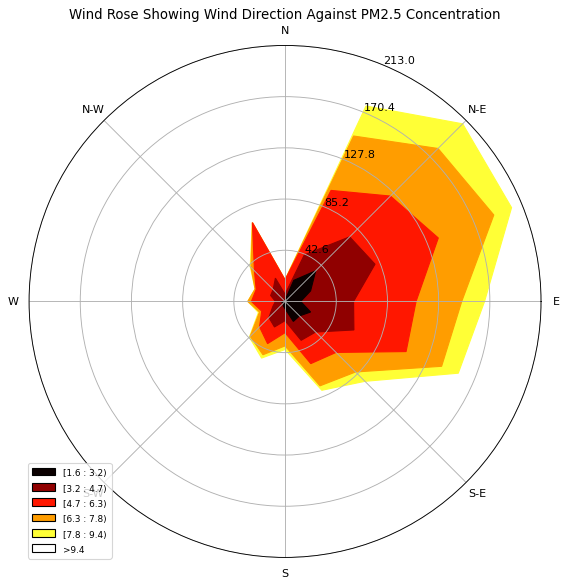

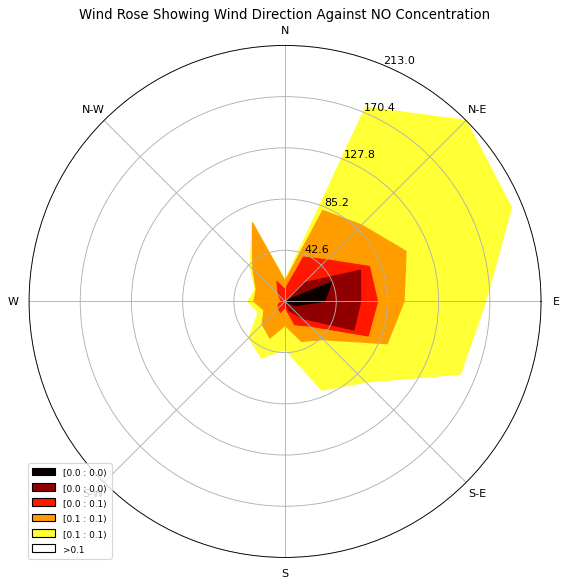

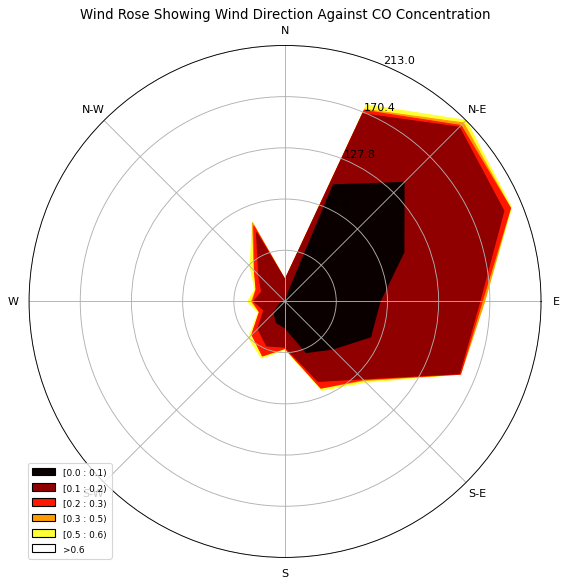

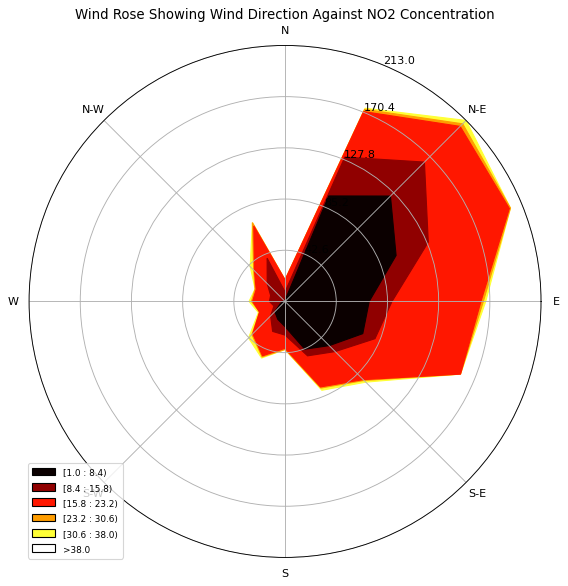

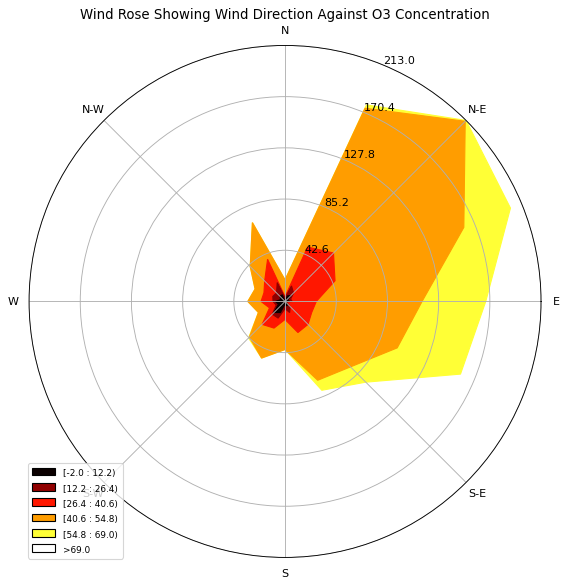

In [14]:
## Makes a windrose from PM2.5
ax = WindroseAxes.from_ax()
ax.contourf(wind_direction_actual, pm25.value, cmap=cm.hot)
ax.set_legend()
plt.title("Wind Rose Showing Wind Direction Against PM2.5 Concentration")
plt.savefig("pm25_windrose")

## Makes a windrose from NO.
ax1 = WindroseAxes.from_ax()
ax1.contourf(wind_direction_actual, no.value, cmap=cm.hot)
ax1.set_legend()
plt.title("Wind Rose Showing Wind Direction Against NO Concentration")
plt.savefig("no_windrose")

## Makes a windrose from CO. 
ax2 = WindroseAxes.from_ax()
ax2.contourf(wind_direction_actual, co.value, cmap=cm.hot)
ax2.set_legend()
plt.title("Wind Rose Showing Wind Direction Against CO Concentration")
plt.savefig("co_windrose")

## Makes a windrose from NO2 (which is reported in ppm, so need to convert to ppb)
ax4 = WindroseAxes.from_ax()
ax4.contourf(wind_direction_actual, no2.value*1000, cmap=cm.hot)
ax4.set_legend()
plt.title("Wind Rose Showing Wind Direction Against NO2 Concentration")
plt.savefig("no2_windrose")

## Makes a windrose of O3 (which is reported in ppm, so need ot convert to ppb)
ax3 = WindroseAxes.from_ax()
ax3.contourf(wind_direction_actual, o3.value*1000, cmap=cm.hot)
ax3.set_legend()
plt.title("Wind Rose Showing Wind Direction Against O3 Concentration")
plt.savefig("o3_windrose")

## Windroses from Ingested WXT files.

In this section, data collected from ingested WXT files are used to plot the windroses. This includes both processing in the data and then displaying them as windroses and any other algorithms that may be required along the way.

In [32]:
wind_direction = np.empty(0)
## Goes for everyday from 17 May to 31 May.
for i in range (17, 32):
    ## Does NOT get data from 27th, 28th, or 29th May.
    if (i == 28 or i == 27 or i == 29):
        continue
    ## Downloads the dataset in question.
    fn = 'C:/Users/jacob/air-quality-sensors/notebooks/datasets/CMS_wxt536_NEIU_a1_202305%d_000000Z.nc' % i
    ds = nc.Dataset(fn)
    wind_direction = np.append(wind_direction, ds['wind_dir_10s'][:])
    print(len(ds["wind_dir_10s"][:]))

## Goes for everyday from 1 June to 18 June.
for i in range (1, 19):
    ## Different download format required if date is abvoe 10.
    if (i < 10):
        fn = 'C:/Users/jacob/air-quality-sensors/notebooks/datasets/CMS_wxt536_NEIU_a1_2023060%d_000000Z.nc' % i
        ds = nc.Dataset(fn)
        wind_direction = np.append(wind_direction, ds['wind_dir_10s'][:])
    ## Skips 13 June.
    elif (i == 13):
        continue
    else:
        fn = 'C:/Users/jacob/air-quality-sensors/notebooks/datasets/CMS_wxt536_NEIU_a1_202306%d_000000Z.nc' % i
        ds = nc.Dataset(fn)
        wind_direction = np.append(wind_direction, ds['wind_dir_10s'][:])

8640
8640
8640
8640
8640
8640
8640
8640
8640
8640
8640
8640


In [33]:
wind_direction_actual = []
mod = 6 ## Since this data was collected every 10 seconds, and needs to be compiled down to every minute)
## Goes through the array of wind_direction.
for i in range(len(wind_direction)):
    ## If the data was taken on the minute, then it is added to wind_direction array. 
    if (i % mod == 0 and i !=0):
        in_question = np.array(wind_direction[i-mod:i])
        avg = np.average(in_question)
        wind_direction_actual.append(avg)
    else:
        continue

In [34]:
len(wind_direction_actual)

41759

In [35]:
len(pm25)

41754

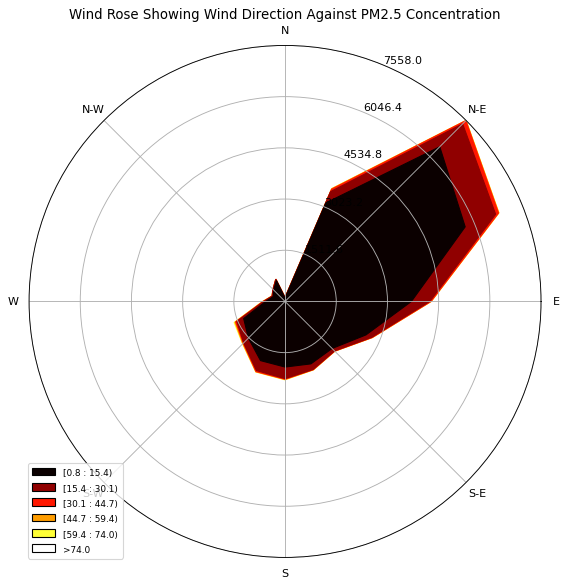

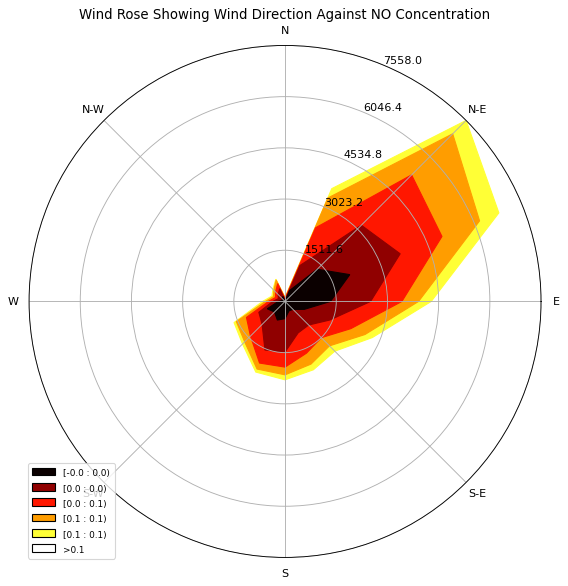

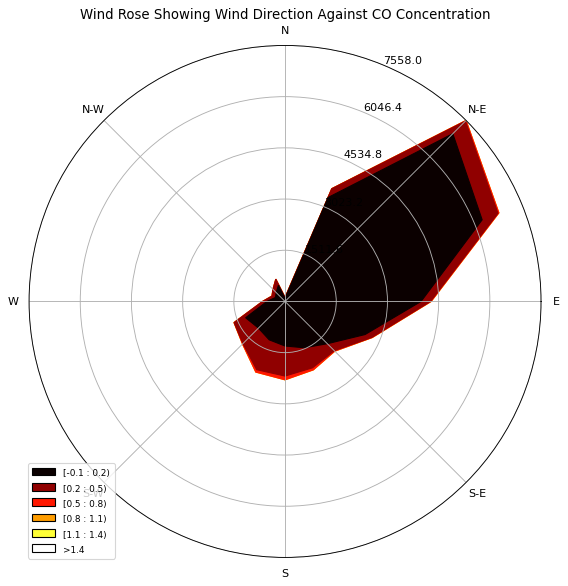

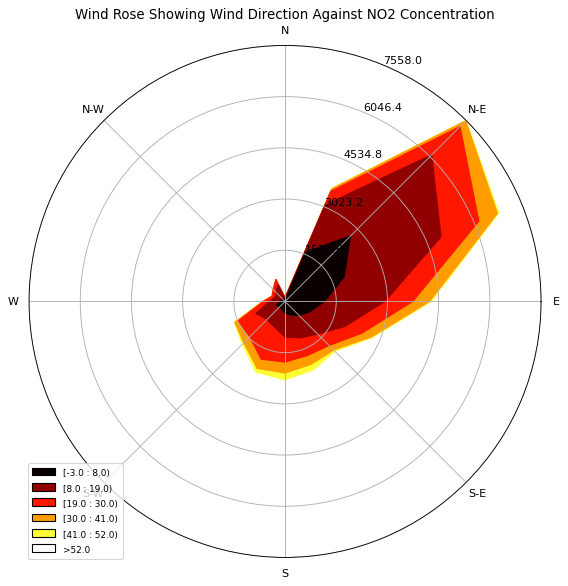

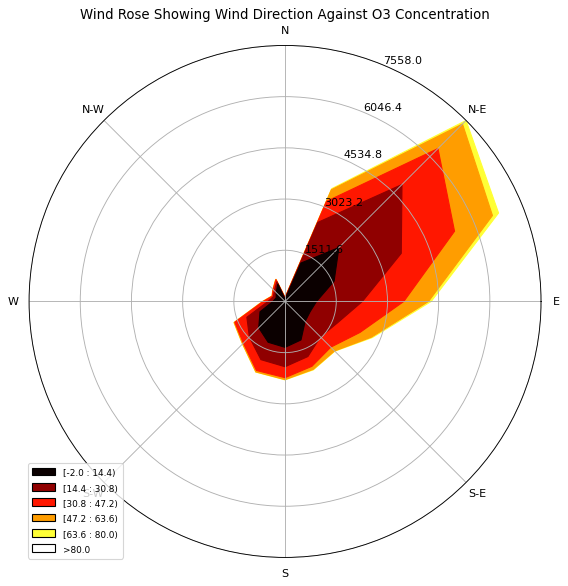

In [113]:
## Windrose of PM2.5 from the ingested WXT data.
ax = WindroseAxes.from_ax()
ax.contourf(wind_direction_actual, pm25, cmap=cm.hot)
ax.set_legend()
plt.title("Wind Rose Showing Wind Direction Against PM2.5 Concentration")
plt.savefig("pm25_windrose_LongTerm")

## Windrose of NO from the ingested WXT data.
ax1 = WindroseAxes.from_ax()
ax1.contourf(wind_direction_actual, no*1000, cmap=cm.hot)
ax1.set_legend()
plt.title("Wind Rose Showing Wind Direction Against NO Concentration")
plt.savefig("no_windrose_LongTerm")

## Windrose of CO from the ingested WXT data. 
ax2 = WindroseAxes.from_ax()
ax2.contourf(wind_direction_actual, co, cmap=cm.hot)
ax2.set_legend()
plt.title("Wind Rose Showing Wind Direction Against CO Concentration")
plt.savefig("co_windrose_LongTerm")

## Windrose of NO2 from ingested WXT data.
ax4 = WindroseAxes.from_ax()
ax4.contourf(wind_direction_actual, no2*1000, cmap=cm.hot)
ax4.set_legend()
plt.title("Wind Rose Showing Wind Direction Against NO2 Concentration")
plt.savefig("no2_windrose_LongTerm")

## Windrose of O3 from ingested WXT data.
ax3 = WindroseAxes.from_ax()
ax3.contourf(wind_direction_actual, o3*1000, cmap=cm.hot)
ax3.set_legend()
plt.title("Wind Rose Showing Wind Direction Against O3 Concentration")
plt.savefig("o3_windrose_LongTerm")

## Using ACT Windroses

In this section, windroses are created using the ACT-built in windrose packages. This includes processing in the data from the ingested WXT files, any other data processing techniques that were used above, and then making the windroses.

In [7]:
import act

In [8]:
## Using ACT to display windrose
## Downloading data so ACT will be happy.
array = []
## Ingesting data from 17th to 31st May. 
for i in range (17, 32):
    ## Not getting data from 27th, 28th or 29th May.
    if (i == 28 or i == 27 or i == 29):
        continue
    fn = 'C:/Users/jacob/air-quality-sensors/notebooks/datasets/CMS_wxt536_NEIU_a1_202305%d_000000Z.nc' % i
    array.append(fn)
## Ingesting data from 1 to 19 June.
for i in range (1, 19):
    ## If date is greater than 10 June, then a different script is needed to ingest the data.
    if (i < 10):
        fn = 'C:/Users/jacob/air-quality-sensors/notebooks/datasets/CMS_wxt536_NEIU_a1_2023060%d_000000Z.nc' % i
        array.append(fn)
    ## Skipping the data from 13 June. 
    elif (i == 13):
        continue
    else:
        fn = 'C:/Users/jacob/air-quality-sensors/notebooks/datasets/CMS_wxt536_NEIU_a1_202306%d_000000Z.nc' % i
        array.append(fn)
## Using ACT to ingest the data.
ds = act.io.armfiles.read_netcdf(array)

In [24]:
new_pm25 = []
new_no = []
new_co = []
new_no2 = []
new_o3 = []
counter = -1
## Going through PM2.5 and doing it 6 times over to get data every 10 seconds.
for i in range(len(pm25)*6):
    ## If the data was taken on the minute, then the counter is increased.
    if (i % 6 == 0):
        counter += 1
        new_pm25.append(pm25[counter])
        new_no.append(no[counter]*1000)
        new_co.append(co[counter])
        new_no2.append(no2[counter]*1000)
        new_o3.append(o3[counter]*1000)
    else:
        new_pm25.append(pm25[counter])
        new_no.append(no[counter]*1000)
        new_co.append(co[counter])
        new_no2.append(no2[counter]*1000)
        new_o3.append(o3[counter]*1000)
## 36 entries were missing (for unknown reasons), so the last entry is repeated 36 times. 
## Although this is not accurate, the data will only be off by as much as 6 minutes (i.e. not the end of the world.)
for i in range(36):
    new_pm25.append(pm25[-1])
    new_no.append(no[counter]*1000)
    new_co.append(co[counter])
    new_no2.append(no2[counter]*1000)
    new_o3.append(o3[counter]*1000)
## Adding to the dataframe.
ds["pm25"] = new_pm25
ds["no"] = new_no
ds["co"] = new_co
ds["no2"] = new_no2
ds["o3"] = new_o3

C:\Users\jacob\mambaforge\envs\air-quality-sensors-dev\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\jacob\mambaforge\envs\air-quality-sensors-dev\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\jacob\mambaforge\envs\air-quality-sensors-dev\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\jacob\mambaforge\envs\air-quality-sensors-dev\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\jacob\mambaforge\envs\air-quality-sensors-dev\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])


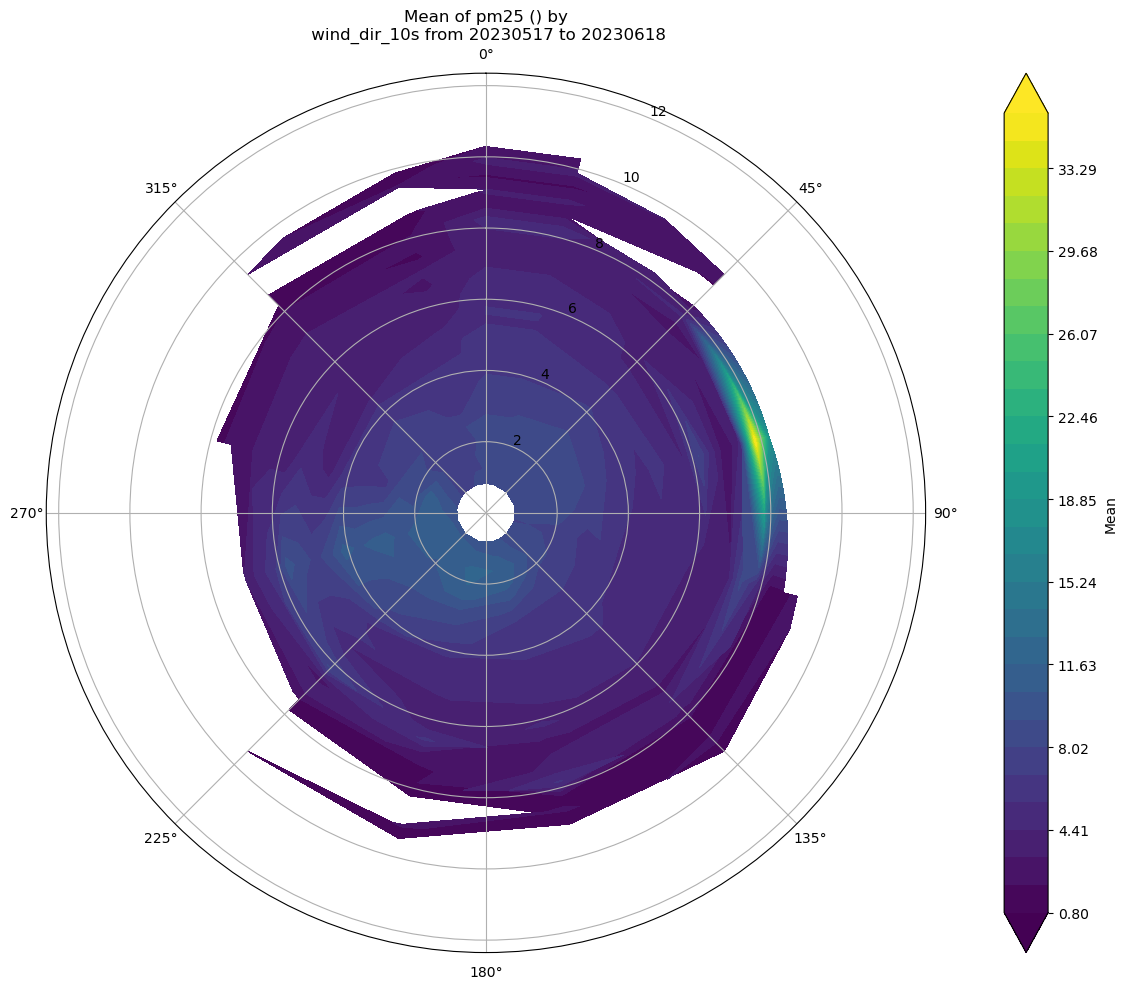

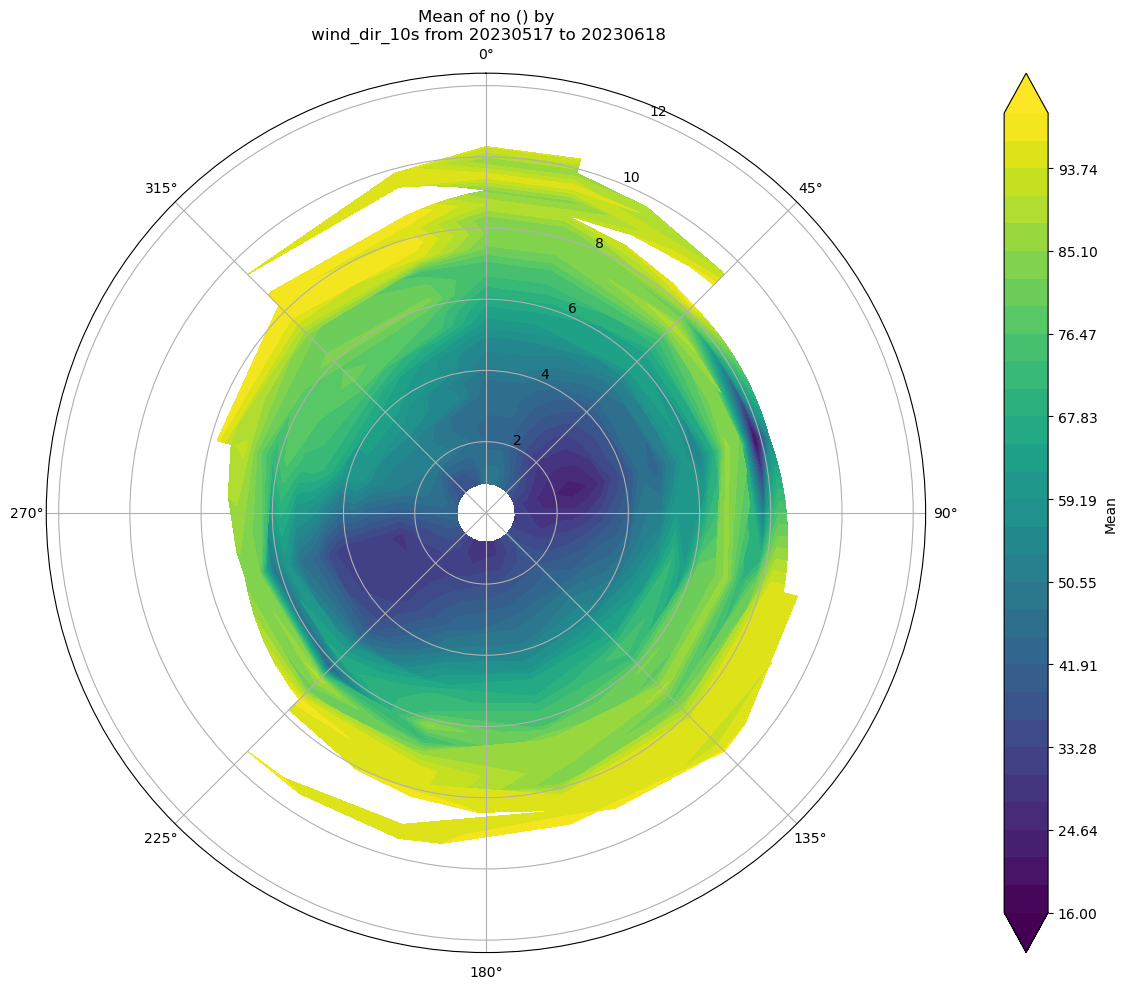

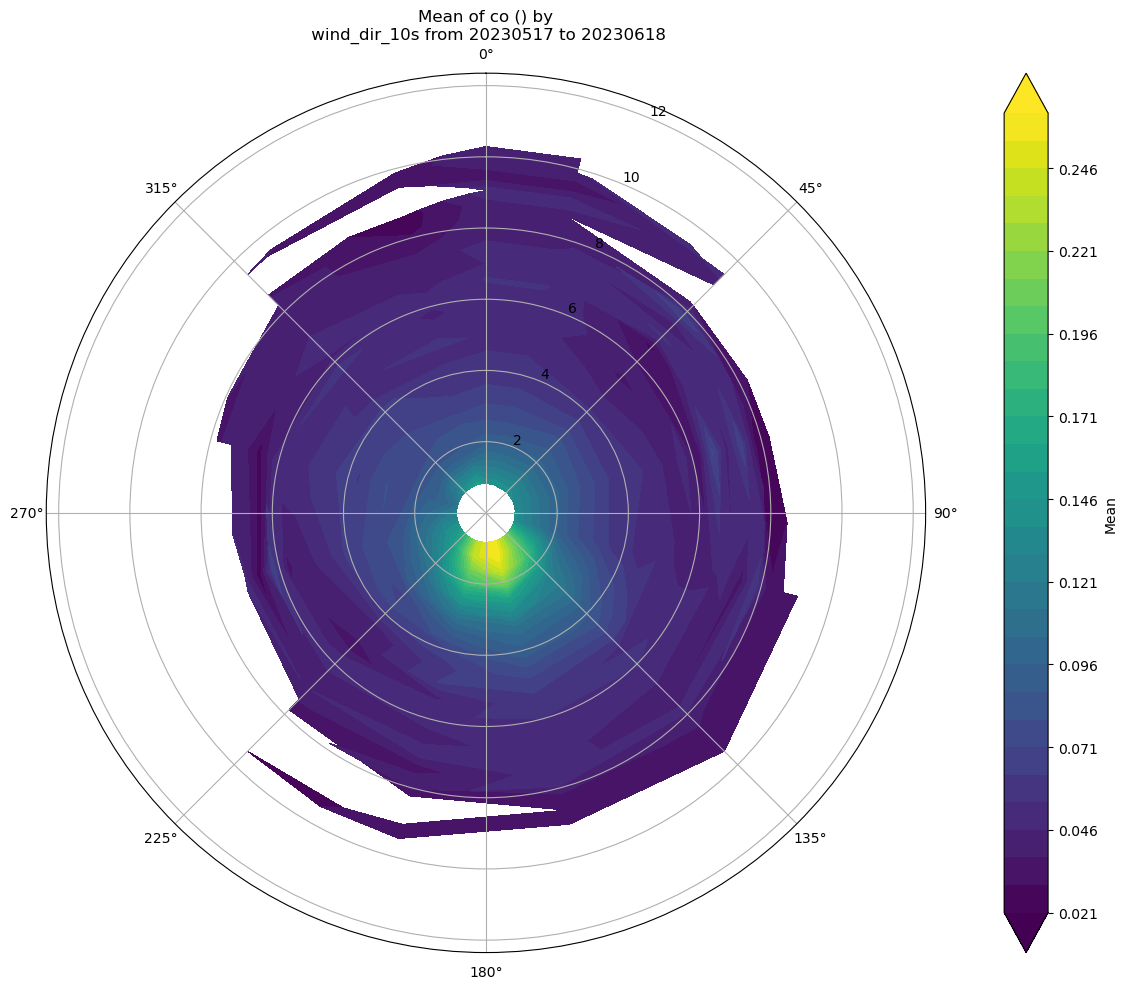

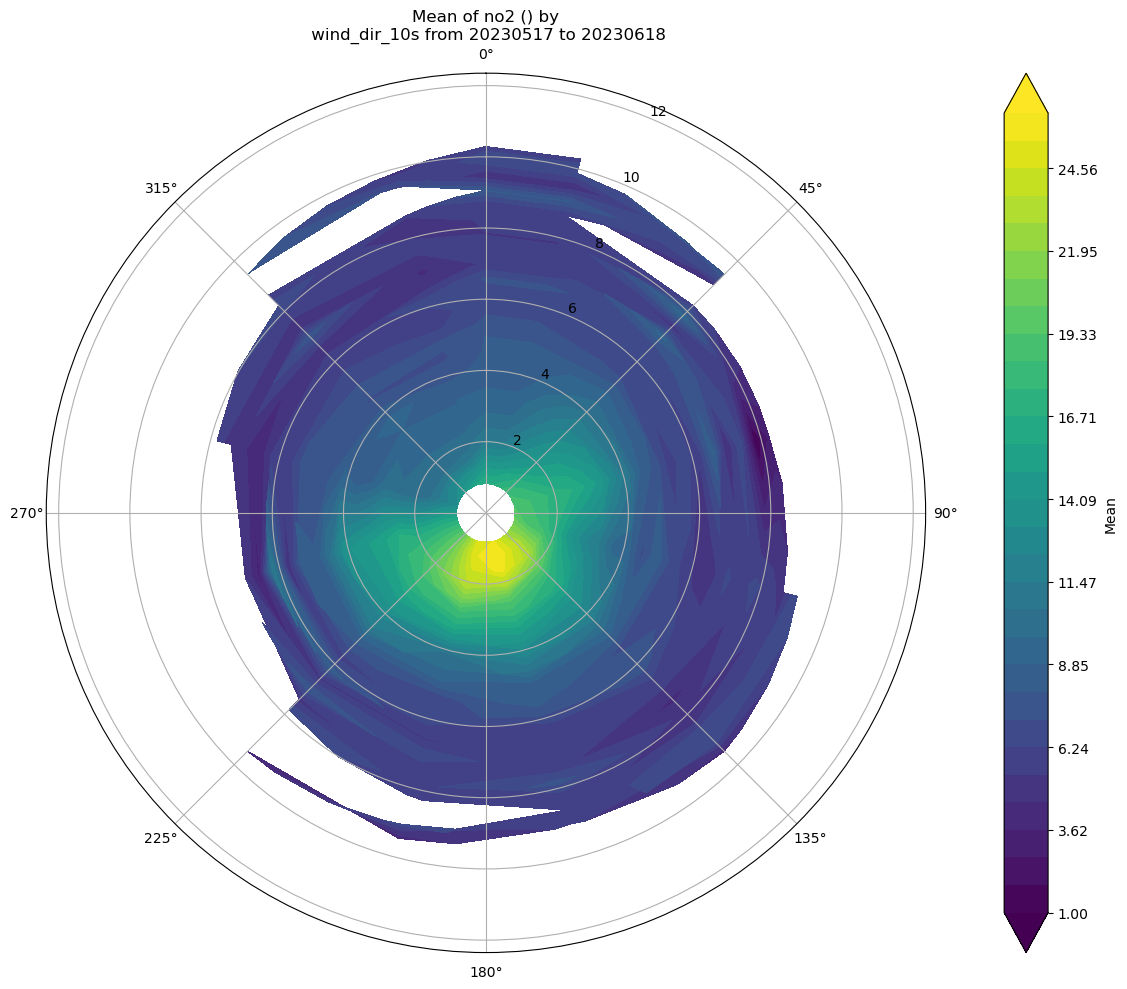

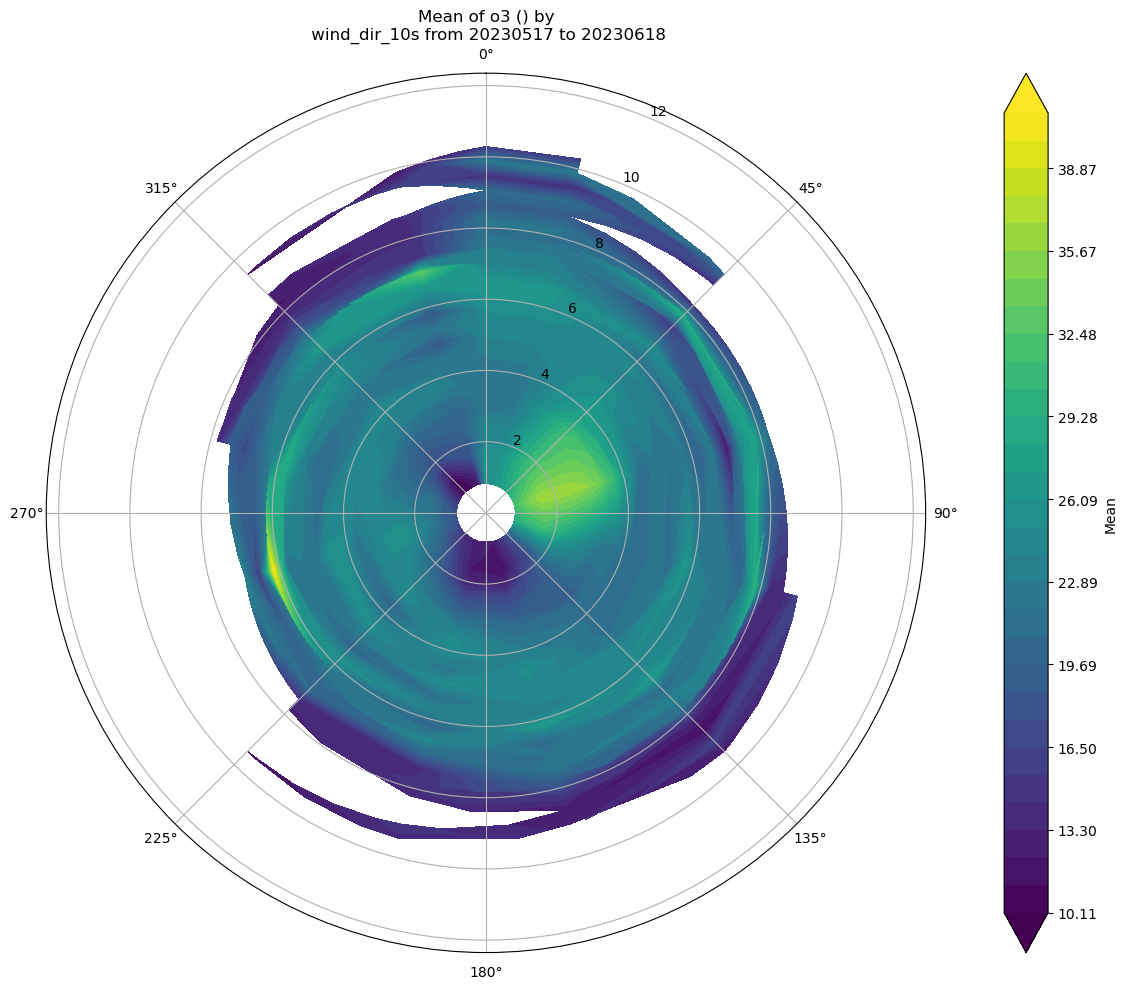

In [27]:
## Making an ACT windrose of PM2.5
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'pm25',
    num_dirs=12,
    plot_type='contour',
    contour_type='mean'
)
plt.savefig("windrose_pm25")

## Making an ACT windrose of NO. 
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'no',
    num_dirs=12,
    plot_type='contour',
    contour_type='mean'
)
plt.savefig("windrose_no")

## Making an ACT windrose of CO.
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'co',
    num_dirs=12,
    plot_type='contour',
    contour_type='mean'
)
plt.savefig("windrose_co")

## Making an ACT windrose of NO2.
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'no2',
    num_dirs=12,
    plot_type='contour',
    contour_type='mean'
)
plt.savefig("windrose_no2")

## Making an ACT windrose of O3.
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'o3',
    num_dirs=12,
    plot_type='contour',
    contour_type='mean'
)
plt.savefig("windrose_o3")

## ACT Boxplots

This section makes wind-rose boxplots using the ACT-built in method. The data is the same as the section above, and therefore no pre-processing is required. This section will only make the box-plots.

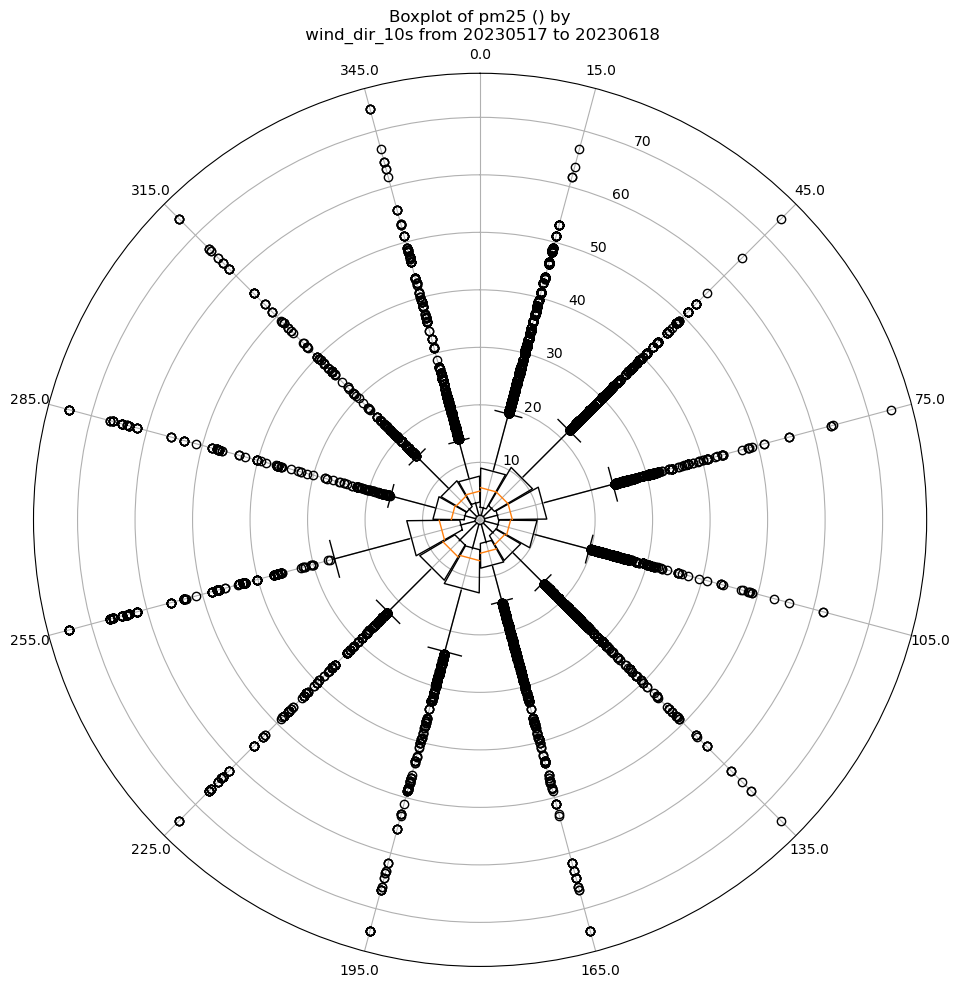

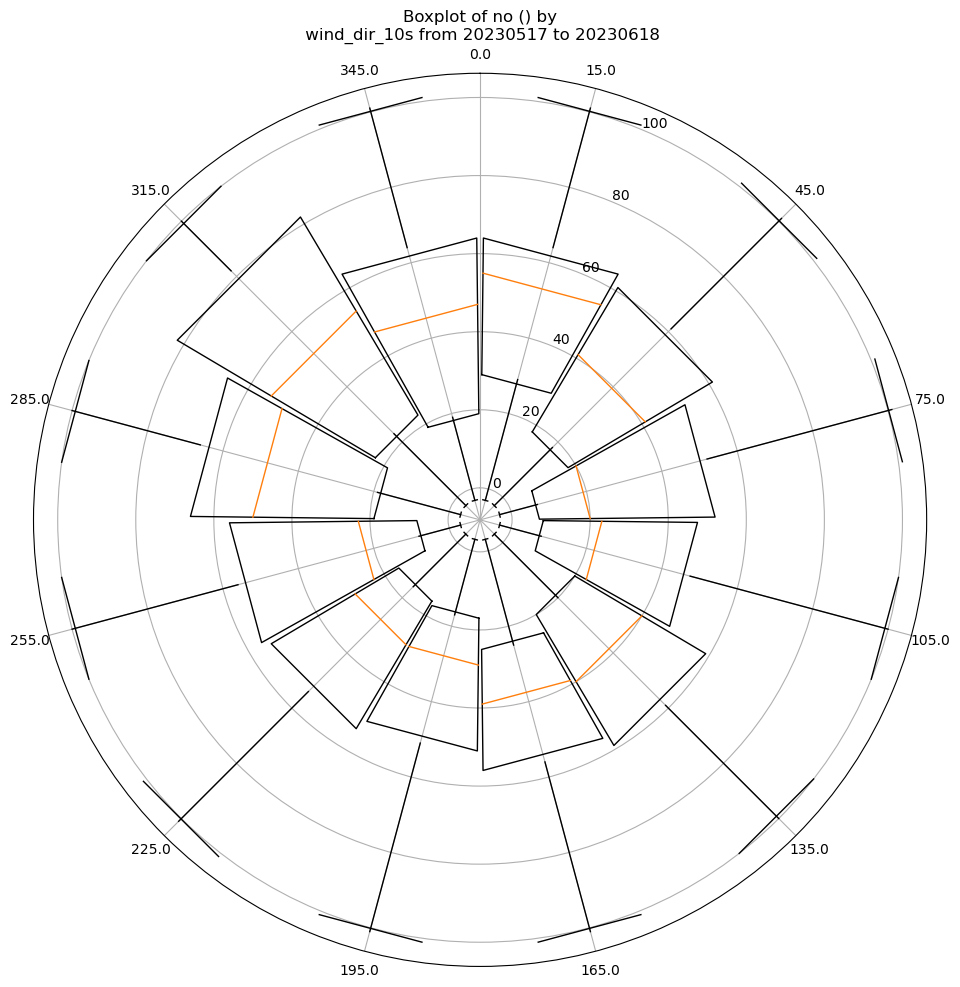

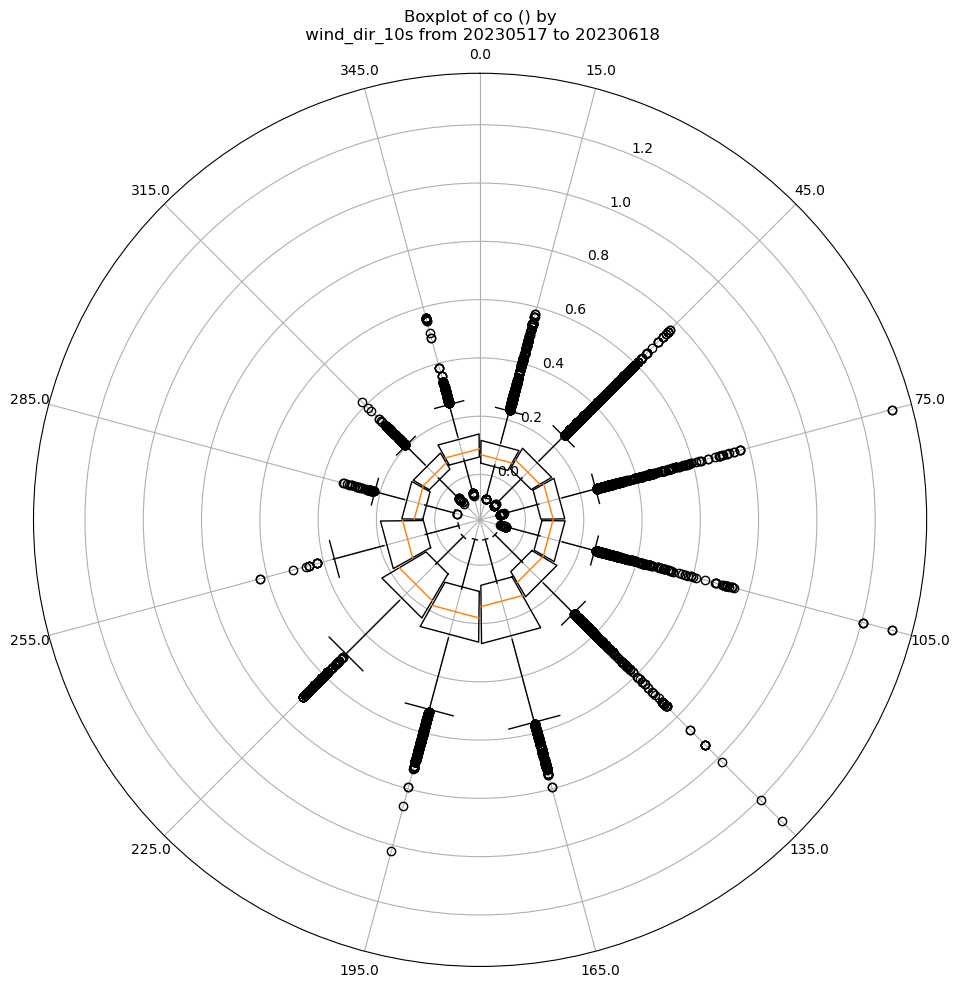

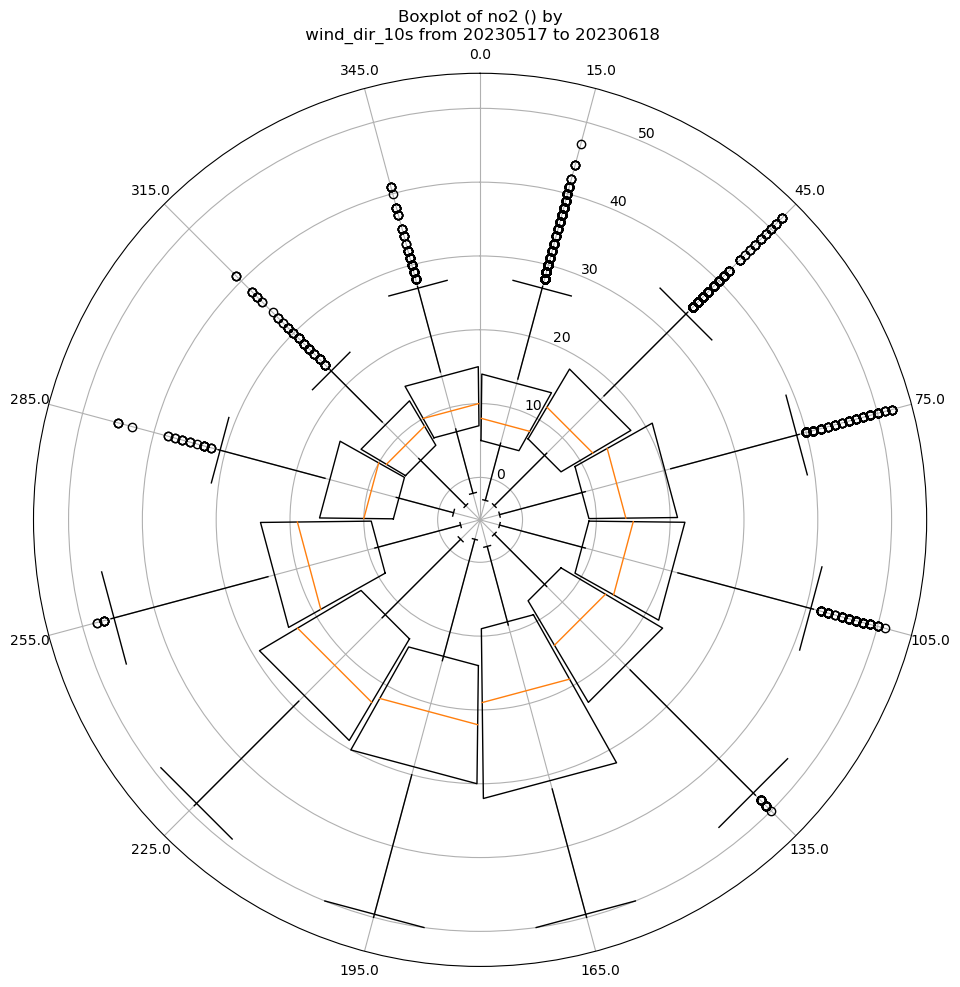

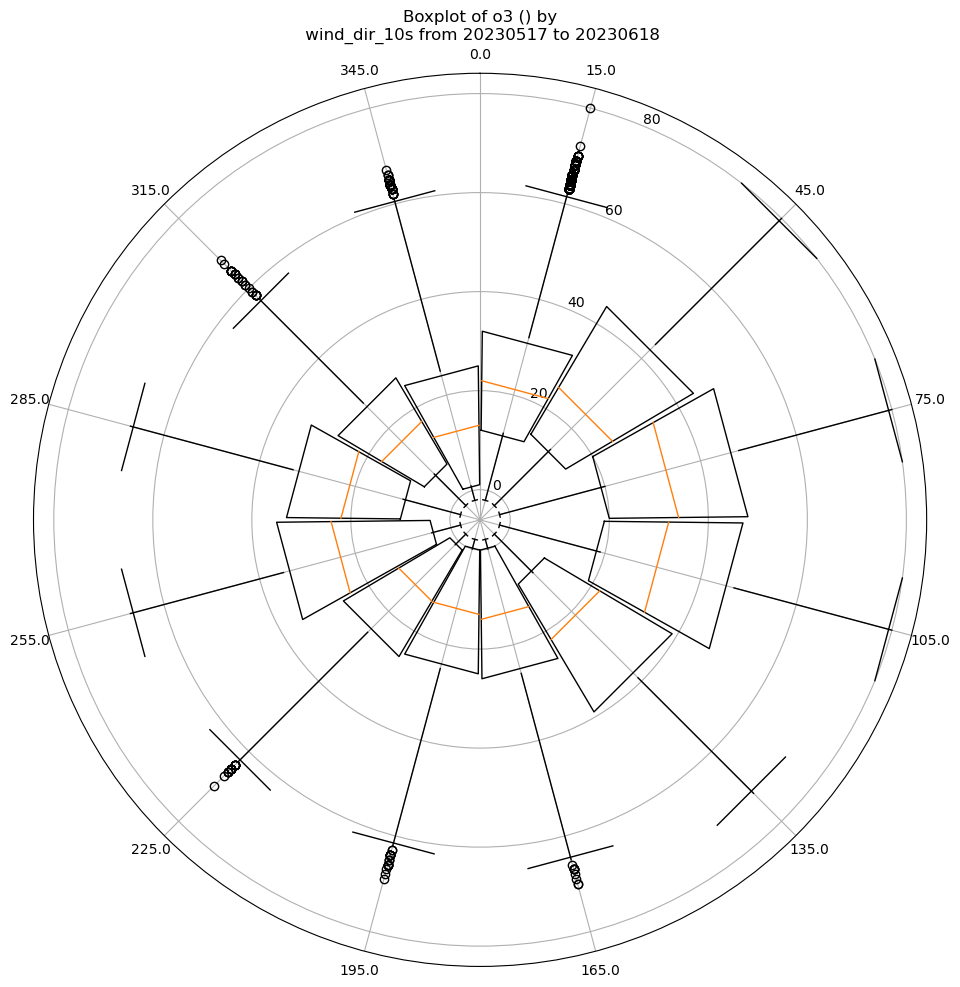

In [32]:
## Making an ACT boxplot of PM2.5
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'pm25',
    num_dirs=12,
    plot_type='boxplot',
)
plt.savefig("boxplot_pm25")

## Making an ACT boxplot of NO. 
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'no',
    num_dirs=12,
    plot_type='boxplot',
)
plt.savefig("boxplot_no")
## Creating an ACT boxplot of CO. 
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'co',
    num_dirs=12,
    plot_type='boxplot',
)
plt.savefig("boxplot_co")

## Creating an ACT boxplot of NO2.
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'no2',
    num_dirs=12,
    plot_type='boxplot',
)
plt.savefig("boxplot_no2")

## Cretaing an ACT boxplot of O3.
display = act.plotting.WindRoseDisplay(ds, figsize=(16, 10))
display.plot_data(
    'wind_dir_10s',
    'wind_mean_10s',
    'o3',
    num_dirs=12,
    plot_type='boxplot',
)
plt.savefig("boxplot_o3")

In [55]:
len(ds['wind_dir_10s'])

250560